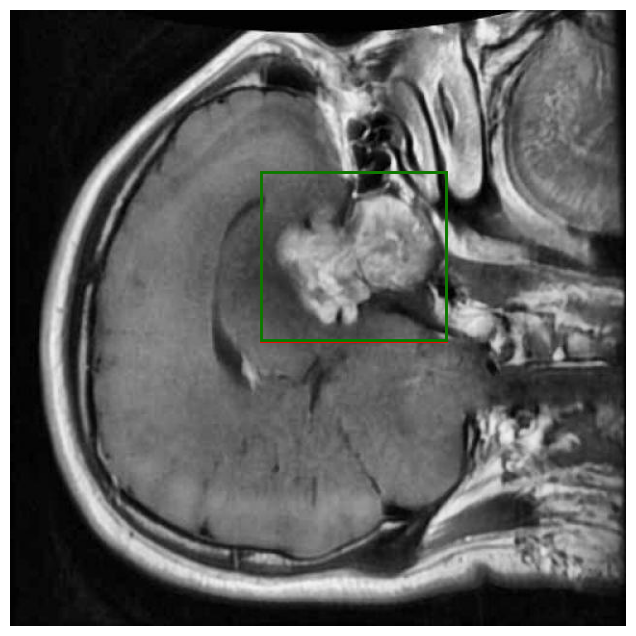

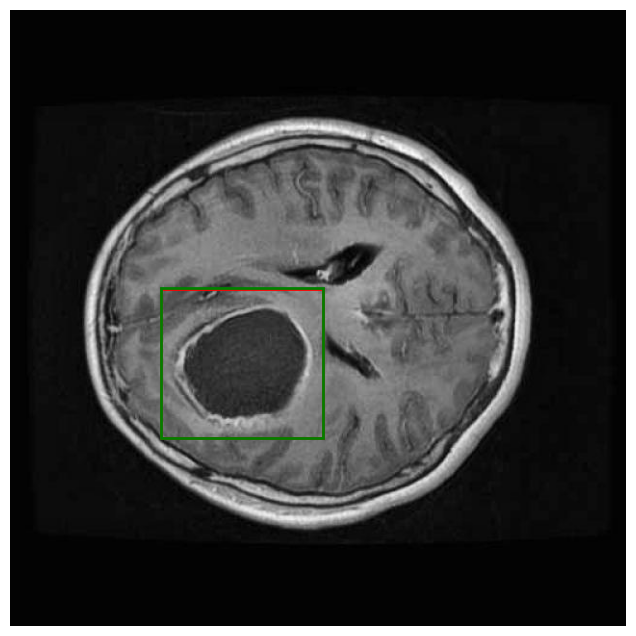

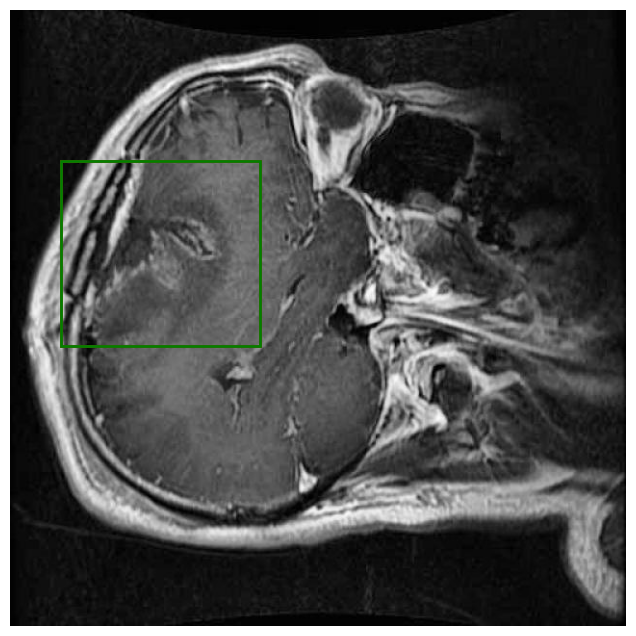

In [4]:
import json
import random
import cv2
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle
from PIL import Image
from torchvision import transforms
from pathlib import Path
import numpy as np

# Load COCO annotations file
with open("../../data/brain_tumors/train/_annotations.coco.json", "r") as f:
    coco_data = json.load(f)

# Load images directory
images_dir = Path("../../data/brain_tumors/train/")

# Create a dictionary to link image IDs with annotations
image_annotations = {}
for annotation in coco_data['annotations']:
    image_id = annotation['image_id']
    if image_id not in image_annotations:
        image_annotations[image_id] = []
    image_annotations[image_id].append(annotation)

# Randomly select three images
random_images = random.sample(coco_data['images'], 3)

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

# Function to draw segmentation and bounding box on the image
def draw_segmentation_and_bbox(img, annotations):
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)

    for ann in annotations:
        # Draw bounding box
        bbox = ann['bbox']
        x, y, width, height = bbox
        rect = Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Draw segmentation
        for seg in ann['segmentation']:
            poly = np.array(seg).reshape((len(seg) // 2, 2))
            polygon = Polygon(poly, linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(polygon)
    
    plt.axis('off')
    plt.show()

# Load and display images with annotations
for img_data in random_images:
    image_path = images_dir / img_data['file_name']
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img)
    
    # Draw segmentation and bounding box
    if img_data['id'] in image_annotations:
        draw_segmentation_and_bbox(img, image_annotations[img_data['id']])
